In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


In [2]:
df = pd.read_csv(path+'\\Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df3 = df

col_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in col_list:
    df3[i] = df3[i].map({'yes': 1, 'no': 0})

df3['furnishingstatus'] = df3['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
df3['price'] = df3['price'] / 1e6
df3['area'] = df3['area'] / 1e3

df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13.30000,7.42,4,2,3,1,0,0,0,1,2,1,2
1,12.25000,8.96,4,4,4,1,0,0,0,1,3,0,2
2,12.25000,9.96,3,2,2,1,0,1,0,0,2,1,1
3,12.21500,7.50,4,2,2,1,0,1,0,1,3,1,2
4,11.41000,7.42,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,1,0,1,0,0,2,0,0
541,1.76715,2.40,3,1,1,0,0,0,0,0,0,0,1
542,1.75000,3.62,2,1,1,1,0,0,0,0,0,0,0
543,1.75000,2.91,3,1,1,0,0,0,0,0,0,0,2


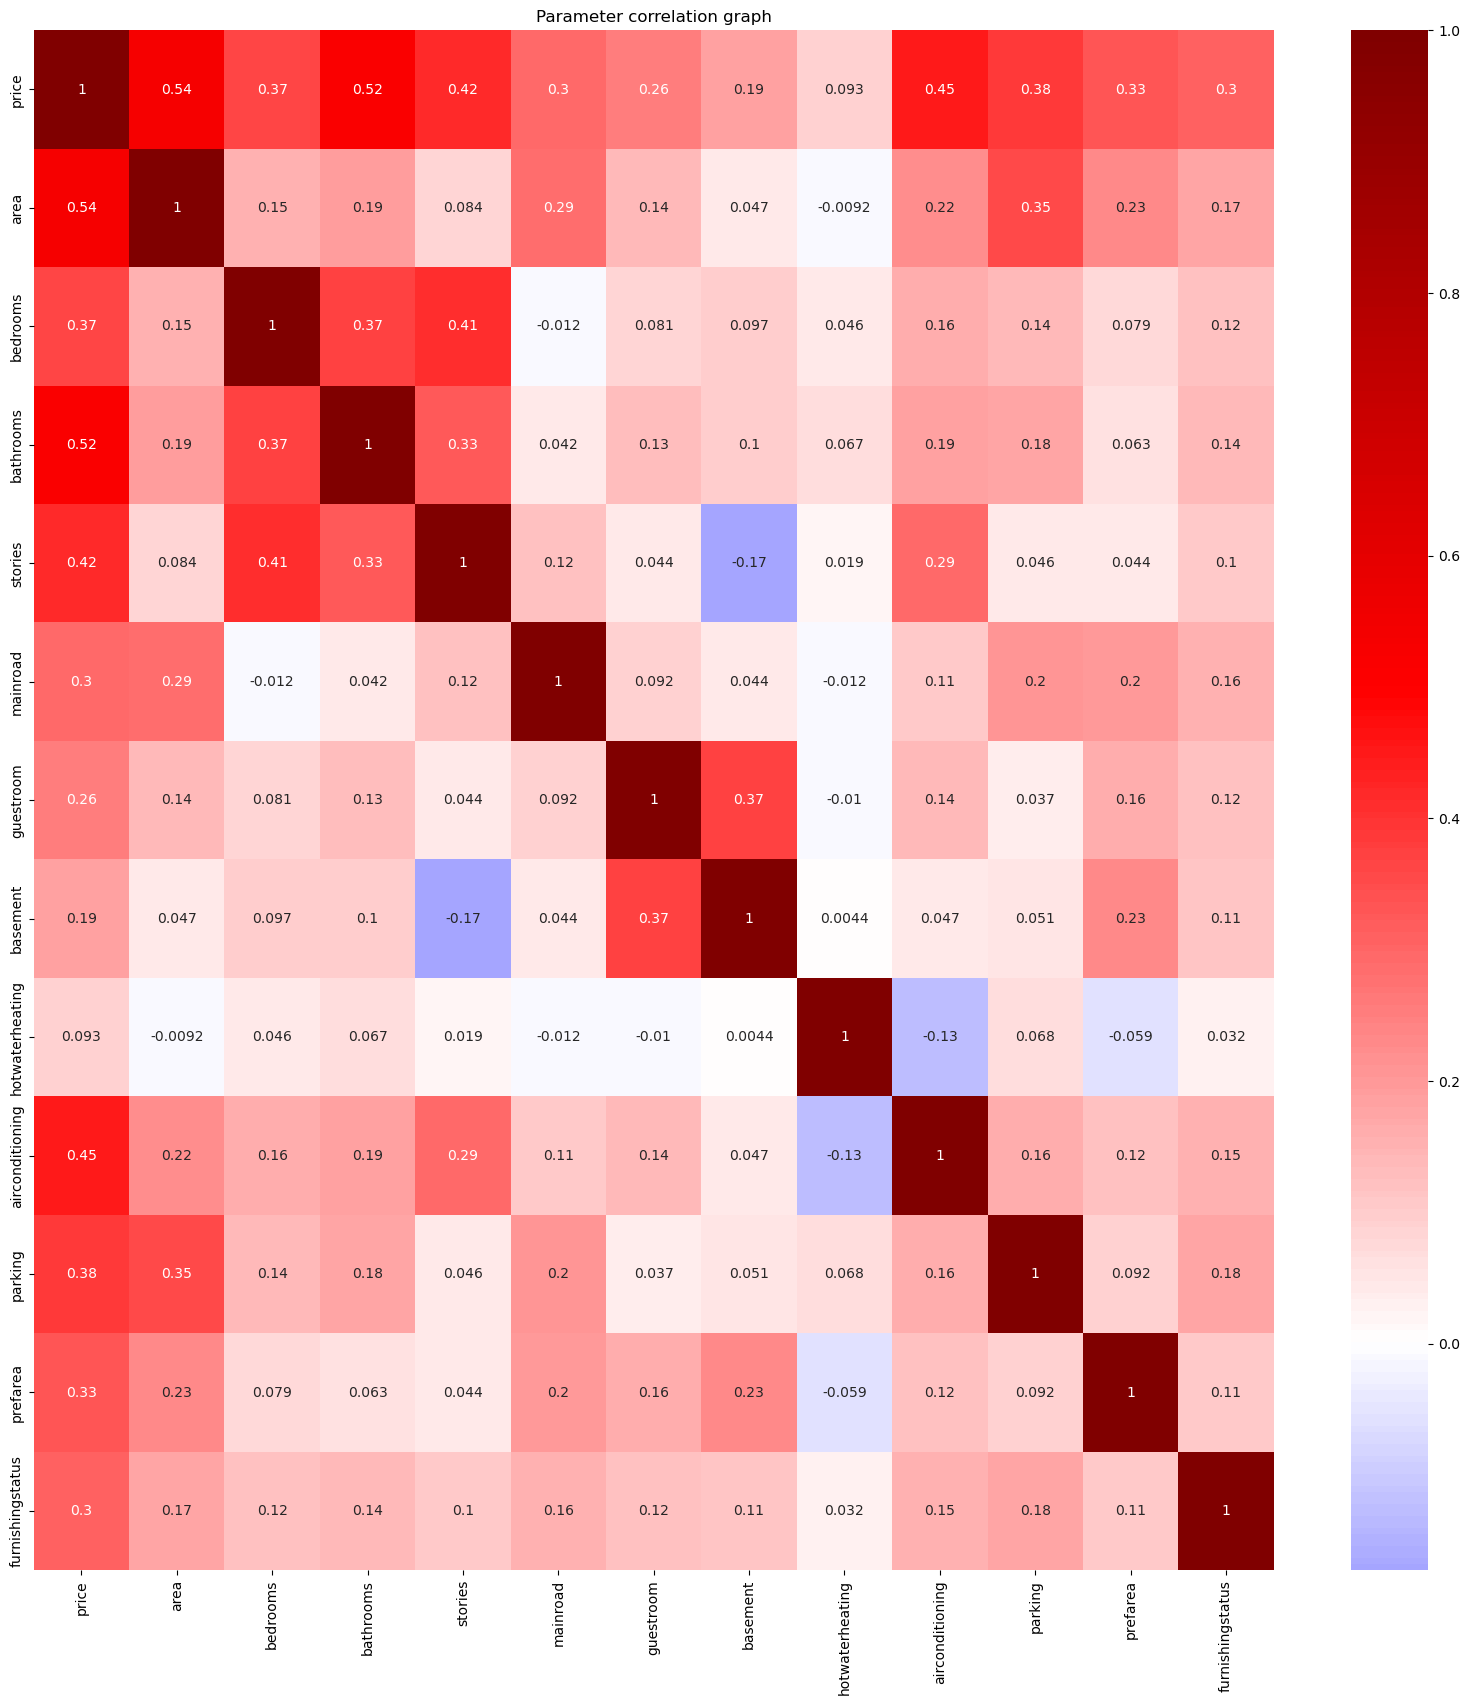

In [4]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x = df3.loc[:,df3.drop(['price'], axis = 1).columns].to_numpy()
y = df3.loc[:,['price']].to_numpy().flatten()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [13]:
x_train.shape

(490, 12)

In [29]:
import tensorflow as tf
import keras

# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='relu')
    
])

# Визуализируем архитектуру
model.summary()

# Компилируем модель
model.compile(optimizer='adam',
              loss='mse',
              metrics=['R2Score'])

# Обучаем модель
model.fit(x_train, y_train, validation_split = 0.15, batch_size = 16, epochs = 500, verbose = 0)

# Оценим точность модели
test_loss, test_r2 = model.evaluate(x_test, y_test)
train_loss, train_r2 = model.evaluate(x_train, y_train)
print('\nМетрика обучения \ теста (полносвязная сеть):', train_r2, ' \ ', test_r2)

D:\zmei\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - R2Score: 0.6505 - loss: 1.6238
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: 0.7135 - loss: 0.9617 

Метрика обучения \ теста (полносвязная сеть): 0.7134714126586914  \  0.6505187153816223


k-fold метрика [0.4565127  0.28416807 0.60074185 0.48453815 0.52617236 0.09124007
 0.63461776 0.41139573 0.59931503 0.4209315 ]


[Text(0.5572916666666666, 0.9285714285714286, 'x[0] <= 5.497\nsquared_error = 3.356\nsamples = 490\nvalue = 4.792'),
 Text(0.34375, 0.7857142857142857, 'x[2] <= 1.5\nsquared_error = 1.501\nsamples = 300\nvalue = 3.971'),
 Text(0.4505208333333333, 0.8571428571428572, 'True  '),
 Text(0.22916666666666666, 0.6428571428571429, 'x[11] <= 0.5\nsquared_error = 1.036\nsamples = 246\nvalue = 3.735'),
 Text(0.125, 0.5, 'x[0] <= 4.045\nsquared_error = 0.8\nsamples = 99\nvalue = 3.229'),
 Text(0.08333333333333333, 0.35714285714285715, 'x[1] <= 2.5\nsquared_error = 0.457\nsamples = 67\nvalue = 2.983'),
 Text(0.041666666666666664, 0.21428571428571427, 'squared_error = 0.273\nsamples = 29\nvalue = 2.805'),
 Text(0.125, 0.21428571428571427, 'squared_error = 0.554\nsamples = 38\nvalue = 3.12'),
 Text(0.16666666666666666, 0.35714285714285715, 'squared_error = 1.127\nsamples = 32\nvalue = 3.744'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 3.505\nsquared_error = 0.906\nsamples = 147\nvalue = 4.076'),
 Text(

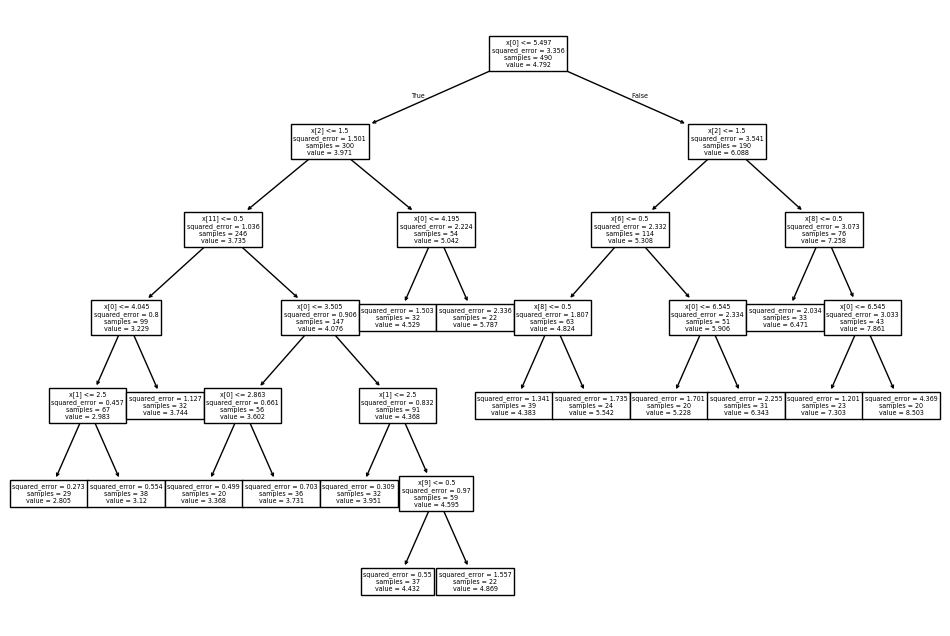

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

clf = DecisionTreeRegressor(random_state = 0, max_depth = 10, min_samples_leaf = 20)

print('k-fold метрика', cross_val_score(clf, x_train, y_train, cv=10))

clf.fit(x_train, y_train)

plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

In [17]:
print('Метрика обучения \ теста (дерево решений):', clf.score(x_train, y_train), ' \ ', clf.score(x_test, y_test))

Метрика обучения \ теста (дерево решений): 0.6082475603581625  \  0.5091240196899605


In [18]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 10, random_state = 0, min_samples_leaf = 20, n_estimators = 100)

regr.fit(x_train, y_train)

cross_val_score(regr, x_train, y_train, cv=10)

print('k-fold метрика', cross_val_score(regr, x_train, y_train, cv=10))

print('\nМетрика обучения \ теста (random forest):', regr.score(x_train, y_train), ' \ ', regr.score(x_test, y_test))

k-fold метрика [0.403191   0.40558962 0.56662655 0.62922081 0.54026574 0.31913306
 0.69906971 0.42548214 0.59483734 0.4889089 ]

Метрика обучения \ теста (random forest): 0.610566524946057  \  0.5474287396709978


In [19]:
from catboost import CatBoostRegressor

model1 = CatBoostRegressor(iterations = 200, learning_rate = 0.01, depth = 10, min_data_in_leaf = 20, early_stopping_rounds=20)
model1.fit(x_train, y_train, eval_set = (x_test, y_test), verbose = 0)

print('Метрика обучения \ теста (catboost):', model1.score(x_train, y_train), ' \ ', model1.score(x_test, y_test))

Метрика обучения \ теста (catboost): 0.710552390514462  \  0.5012506134533147


In [20]:
from lightgbm import LGBMRegressor
import warnings

warnings.filterwarnings("ignore", category = UserWarning, message = "X does not have valid feature names")

model2 = LGBMRegressor(n_estimators = 200, learning_rate = 0.01, max_depth = 10, min_child_samples = 20, verbose = -1)

model2.fit(x_train, y_train, eval_set = (x_test, y_test))

print('Метрика обучения \ теста (LightGBM):', model2.score(x_train, y_train), ' \ ', model2.score(x_test, y_test))

Метрика обучения \ теста (LightGBM): 0.7116201103134074  \  0.5975634789168545


In [21]:
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators = 200, learning_rate = 0.01, max_depth = 10, min_child_weight = 20)

model3.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = 0)

print('Метрика обучения \ теста (XGBoost):', model3.score(x_train, y_train), ' \ ', model3.score(x_test, y_test))

Метрика обучения \ теста (XGBoost): 0.7062064974610112  \  0.5909260871939933


In [30]:
print('итого имеем для одних и тех же настроек (кроме полносвязной сети): ')
print('Метрика(R2) обучения \ теста (полносвязная сеть): \t', round(train_r2, 3), ' \ ', round(test_r2, 3))
print('Метрика(R2) обучения \ теста (дерево решений): \t\t', round(clf.score(x_train, y_train), 3), ' \ ', round(clf.score(x_test, y_test), 3))
print('Метрика(R2) обучения \ теста (random forest): \t\t', round(regr.score(x_train, y_train), 3), ' \ ', round(regr.score(x_test, y_test), 3))
print('Метрика(R2) обучения \ теста (catboost): \t\t', round(model1.score(x_train, y_train), 3), ' \ ', round(model1.score(x_test, y_test), 3))
print('Метрика(R2) обучения \ теста (LightGBM): \t\t', round(model2.score(x_train, y_train), 3), ' \ ', round(model2.score(x_test, y_test), 3))
print('Метрика(R2) обучения \ теста (XGBoost): \t\t', round(model3.score(x_train, y_train), 3), ' \ ', round(model3.score(x_test, y_test), 3))

итого имеем для одних и тех же настроек (кроме полносвязной сети): 
Метрика(R2) обучения \ теста (полносвязная сеть): 	 0.713  \  0.651
Метрика(R2) обучения \ теста (дерево решений): 		 0.608  \  0.509
Метрика(R2) обучения \ теста (random forest): 		 0.611  \  0.547
Метрика(R2) обучения \ теста (catboost): 		 0.711  \  0.501
Метрика(R2) обучения \ теста (LightGBM): 		 0.712  \  0.598
Метрика(R2) обучения \ теста (XGBoost): 		 0.706  \  0.591


In [23]:
# визуально, лучшие результаты имеет полносвязная сеть, LightGBM и XGBoost
# подберем параметры для LightGBM и XGBoost

def grid(matr, x, y, mode) -> None:
    for n_estimators in range(20, 200, 20):
        temp1 = []
        for learning_rate in range(5, 20, 5):
            temp2 = []
            for max_depth in range(4, 20, 4):
                temp3 = []
                for min_child_samples in range(2, 42, 4):
                    if mode == 'lgbm':
                        model_lgbm = LGBMRegressor(n_estimators = n_estimators, learning_rate = learning_rate / 1000, max_depth = max_depth, min_child_samples = min_child_samples, verbose = -1)
                        model_lgbm.fit(x_train, y_train, eval_set = (x_test, y_test))
                        temp3.append(model_lgbm.score(x, y))
                    elif mode == 'xgb':
                        model_xgb = XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate / 1000, max_depth = max_depth, min_child_weight = min_child_samples)
                        model_xgb.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = 0)
                        temp3.append(model_xgb.score(x, y))
                temp2.append(temp3)
            temp1.append(temp2)
        matr.append(temp1)

In [24]:
LightGBM_matrix_train = []
LightGBM_matrix_test = []
XGBoost_matrix_train = []
XGBoost_matrix_test = []

grid(LightGBM_matrix_train, x_train, y_train, 'lgbm')
grid(LightGBM_matrix_test, x_test, y_test, 'lgbm')
grid(XGBoost_matrix_train, x_train, y_train, 'xgb')
grid(XGBoost_matrix_test, x_test, y_test, 'xgb')

In [31]:
print('лучший результат по тестовой метрике в LightGBM')

numpy_LightGBM_matrix_train = np.array(LightGBM_matrix_train)
numpy_LightGBM_matrix_test = np.array(LightGBM_matrix_test)
num_max_LightGBM = np.max(numpy_LightGBM_matrix_test)
position_LightGBM = np.argmax(numpy_LightGBM_matrix_test)
position_in_arr_LightGBM = np.unravel_index(position_LightGBM, numpy_LightGBM_matrix_test.shape)

print('Метрика(R2) обучения \ теста:', round(float(numpy_LightGBM_matrix_train[position_in_arr_LightGBM]), 3), ' \ ', round(float(num_max_LightGBM), 3))
print('---ПАРАМЕТРЫ---')
print('количество деревьев:', 20 + 20*position_in_arr_LightGBM[0])
print('скорость обучения:', (5 + 5*position_in_arr_LightGBM[1]) / 1000)
print('глубина дерева:', 4 + 4*position_in_arr_LightGBM[2])
print('минимальное количество samples в листах:', 2 + 4*position_in_arr_LightGBM[3])

лучший результат по тестовой метрике в LightGBM
Метрика(R2) обучения \ теста: 0.757  \  0.639
---ПАРАМЕТРЫ---
количество деревьев: 180
скорость обучения: 0.015
глубина дерева: 8
минимальное количество samples в листах: 18


In [32]:
print('лучший результат по тестовой метрике в XGBoost')

numpy_XGBoost_matrix_train = np.array(XGBoost_matrix_train)
numpy_XGBoost_matrix_test = np.array(XGBoost_matrix_test)
num_max_XGBoost = np.max(numpy_XGBoost_matrix_test)
position_XGBoost = np.argmax(numpy_XGBoost_matrix_test)
position_in_arr_XGBoost = np.unravel_index(position_XGBoost, numpy_XGBoost_matrix_test.shape)

print('Метрика(R2) обучения \ теста:', round(float(numpy_XGBoost_matrix_train[position_in_arr_XGBoost]), 3), ' \ ', round(float(num_max_XGBoost), 3))
print('---ПАРАМЕТРЫ---')
print('количество деревьев:', 20 + 20*position_in_arr_XGBoost[0])
print('скорость обучения:', (5 + 5*position_in_arr_XGBoost[1]) / 1000)
print('глубина дерева:', 4 + 4*position_in_arr_XGBoost[2])
print('минимальное количество samples в листах:', 2 + 4*position_in_arr_XGBoost[3])

лучший результат по тестовой метрике в XGBoost
Метрика(R2) обучения \ теста: 0.753  \  0.63
---ПАРАМЕТРЫ---
количество деревьев: 180
скорость обучения: 0.015
глубина дерева: 16
минимальное количество samples в листах: 18


In [67]:
class DecisionTree:
    def __init__(self, max_depth = 5, min_samples_leaf = 100,  max_features = None):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None
    
    def mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y))**2)
    
    def best_split(self, X, y, feature_indices):
        best_mse  = 1000000
        best_feature = None
        best_threshold = None
        
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = X[:, feature_idx] > threshold
                
                if len(y[left_mask]) < self.min_samples_leaf or len(y[right_mask]) < self.min_samples_leaf:
                    continue

                mse_left = self.mse(y[left_mask])
                mse_right = self.mse(y[right_mask])

                total_mse = (len(y[left_mask]) * mse_left + 
                           len(y[right_mask]) * mse_right) / len(y)
                
                if total_mse < best_mse:
                    best_mse = total_mse
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_mse
    
    def build_tree(self, X, y, depth = 0):

        if (depth >= self.max_depth or len(y) < 2 * self.min_samples_leaf or self.mse(y) < 1e-6):
            return {'prediction': np.mean(y)}

        n_features = X.shape[1]
        if self.max_features is not None:
            n_selected = min(self.max_features, n_features)
            feature_indices = np.random.choice(n_features, n_selected, replace=False)
        else:
            feature_indices = np.arange(n_features)
        
        feature, threshold, mse = self.best_split(X, y, feature_indices)
        
        if feature is None or mse == 1000000:
            return {'prediction': np.mean(y)}
        
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold
        
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_subtree,
            'right': right_subtree,
            'mse': mse
        }
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)
    
    def predict_one(self, x, node):
        if 'prediction' in node:
            return node['prediction']
        
        feature = node['feature']
        threshold = node['threshold']
        
        if x[feature] <= threshold:
            return self.predict_one(x, node['left'])
        else:
            return self.predict_one(x, node['right'])
    
    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

    def print_tree(self, node = None, depth = 0):
        if node is None:
            node = self.tree
        indent = "    " * depth
        if 'prediction' in node:
            print(f"{indent}Предсказание: {node['prediction']}")
        else:
            print(f"{indent}Признак {node['feature']} <= {node['threshold']}")
            print(f"{indent}mse: {node['mse']}")
            self.print_tree(node['left'], depth + 1)
            self.print_tree(node['right'], depth + 1)       

In [68]:
one_tree = DecisionTree(max_depth = 10, min_samples_leaf = 20)
one_tree.fit(x_train, y_train)

print("Структура дерева:")
one_tree.print_tree()

Структура дерева:
Признак 0 <= 5.495
mse: 2.292155450829614
    Признак 2 <= 1.0
    mse: 1.2495477372481631
        Признак 11 <= 0.0
        mse: 0.8630332844113903
            Признак 0 <= 4.04
            mse: 0.6734205652290158
                Признак 1 <= 2.0
                mse: 0.4321820201533169
                    Предсказание: 2.8045862068965524
                    Предсказание: 3.1197894736842096
                Предсказание: 3.743578125
            Признак 0 <= 3.5
            mse: 0.766971717051282
                Признак 0 <= 2.856
                mse: 0.6304448446527777
                    Предсказание: 3.3684
                    Предсказание: 3.7313888888888886
                Признак 1 <= 2.0
                mse: 0.7376980847457629
                    Предсказание: 3.9506249999999996
                    Признак 9 <= 0.0
                    mse: 0.9255508624911507
                        Предсказание: 4.431851351351352
                        Предсказание: 4.8694545454

In [69]:
from sklearn.metrics import r2_score

print('Метрика(R2) обучения \ теста (собственное дерево решений):', round(r2_score(y_train, one_tree.predict(x_train)), 3), ' \ ', round(r2_score(y_test, one_tree.predict(x_test)), 3))
print('Метрика(R2) обучения \ теста (коробочное дерево решений):', round(clf.score(x_train, y_train), 3), ' \ ', round(clf.score(x_test, y_test), 3))

Метрика(R2) обучения \ теста (собственное дерево решений): 0.608  \  0.509
Метрика(R2) обучения \ теста (коробочное дерево решений): 0.608  \  0.509


In [70]:
class RandomForest:
    def __init__(self, n_estimators = 100, max_depth = 5, min_samples_leaf = 100, max_features = None, bootstrap = True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.trees = []
        self.n_features = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.n_features = n_features
        
        if self.max_features is None:
            max_features = n_features
        else:
            max_features = self.max_features
            
        max_features = max(1, min(max_features, n_features))
        
        for i in range(self.n_estimators):
            tree = DecisionTree(
                max_depth = self.max_depth,
                min_samples_leaf = self.min_samples_leaf,
                max_features = max_features
            )

            if self.bootstrap:
                indices = np.random.choice(n_samples, n_samples, replace = True)
                X_sample = X[indices]
                y_sample = y[indices]
            else:
                X_sample, y_sample = X, y
            
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))
        
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        
        return np.mean(predictions, axis=1)

In [76]:
trees = RandomForest(n_estimators = 100, max_depth = 10, min_samples_leaf = 20, max_features = 9)
trees.fit(x_train, y_train)

print('Метрика(R2) обучения \ теста (собственный random forest):', round(r2_score(y_train, trees.predict(x_train)), 3), ' \ ', round(r2_score(y_test, trees.predict(x_test)), 3))
print('Метрика(R2) обучения \ теста (коробочный random forest):', round(regr.score(x_train, y_train), 3), ' \ ', round(regr.score(x_test, y_test), 3))

Метрика(R2) обучения \ теста (собственный random forest): 0.665  \  0.589
Метрика(R2) обучения \ теста (коробочный random forest): 0.611  \  0.547


In [74]:
class GradientBoosting:
    def __init__(self, n_estimators = 100, learning_rate = 0.1, max_depth = 3, min_samples_leaf = 10, subsample = 1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.subsample = subsample
        self.trees = []
        self.initial_prediction = None
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        self.initial_prediction = np.mean(y)
        predictions = np.full(n_samples, self.initial_prediction)
        
        for i in range(self.n_estimators):
            residuals = y - predictions
            if self.subsample < 1.0:
                n_subsample = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, n_subsample, replace=False)
                X_subset = X[indices]
                residuals_subset = residuals[indices]
            else:
                X_subset = X
                residuals_subset = residuals
            
            tree = DecisionTree(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf)
            tree.fit(X_subset, residuals_subset)
            self.trees.append(tree)
            
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions
            
            #if i % 10 == 0:
            #    mse = np.mean((y - predictions) ** 2)
            #    print(f"Iteration {i}: MSE = {round(mse, 3)}")
    
    def predict(self, X):
        predictions = np.full(len(X), self.initial_prediction)
        
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        
        return predictions
    
    def staged_predict(self, X):
        predictions = np.full((len(X), self.n_estimators + 1), 0.0)
        predictions[:, 0] = self.initial_prediction
        
        for i, tree in enumerate(self.trees):
            predictions[:, i + 1] = predictions[:, i] + self.learning_rate * tree.predict(X)
        
        return predictions

In [108]:
boost = GradientBoosting(n_estimators = 180, learning_rate = 0.015, max_depth = 16, min_samples_leaf = 18, subsample = 0.8)
boost.fit(x_train, y_train)

In [109]:
print('Метрика(R2) обучения \ теста (собственный GradientBoosting):\t\t', round(r2_score(y_train, boost.predict(x_train)), 3), ' \ ', round(r2_score(y_test, boost.predict(x_test)), 3))
print('Метрика(R2) обучения \ теста (коробочный XGBoost (лучший результат)):\t', round(float(numpy_XGBoost_matrix_train[position_in_arr_XGBoost]), 3), ' \ ', round(float(num_max_XGBoost), 3))

Метрика(R2) обучения \ теста (собственный GradientBoosting):		 0.743  \  0.636
Метрика(R2) обучения \ теста (коробочный XGBoost (лучший результат)):	 0.753  \  0.63


In [117]:
xgb = XGBRegressor(n_estimators = 189, learning_rate = 0.015, max_depth = 16, min_child_weight = 18)
xgb.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = 0)
print('Метрика обучения \ теста (xgb):', round(xgb.score(x_train, y_train), 3), ' \ ', round(xgb.score(x_test, y_test), 3))

Метрика обучения \ теста (xgb): 0.76  \  0.633


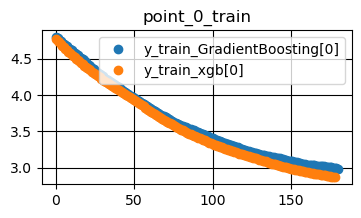

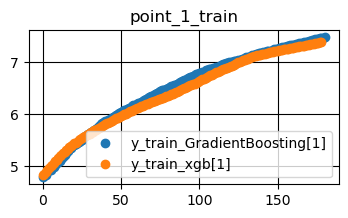

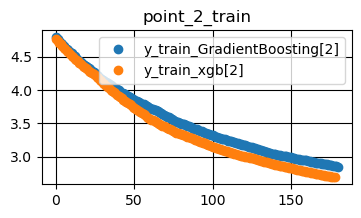

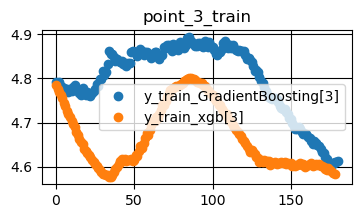

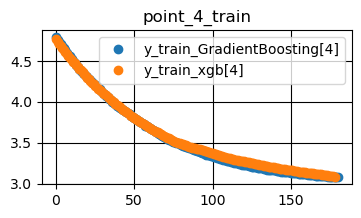

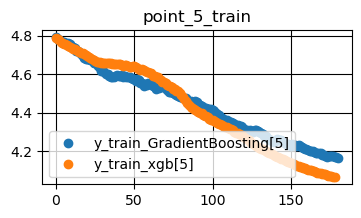

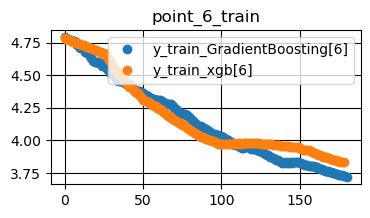

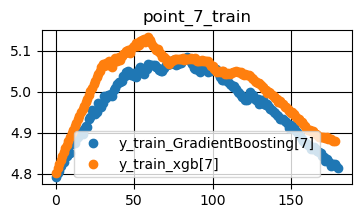

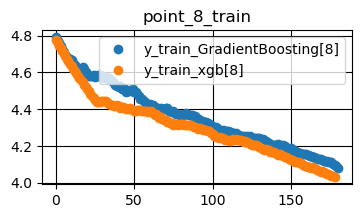

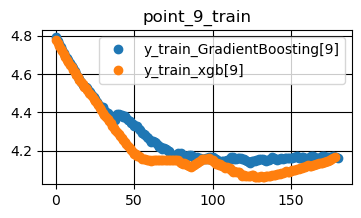

In [135]:
for i in range(10):
    plt.figure(figsize = (4, 2))
    plt.title(f'point_{i}_train')
    plt.plot(boost.staged_predict(x_train)[i], 'o', label = f'y_train_GradientBoosting[{i}]')
    plt.plot([xgb.predict(x_train, iteration_range = (0, j))[i] for j in range(1, 180)], 'o', label = f'y_train_xgb[{i}]')
    plt.legend()
    plt.grid(True, color = 'k')

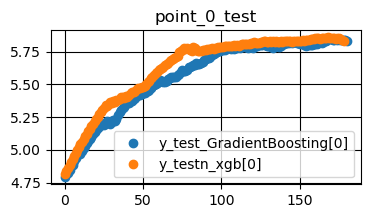

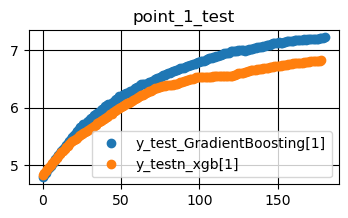

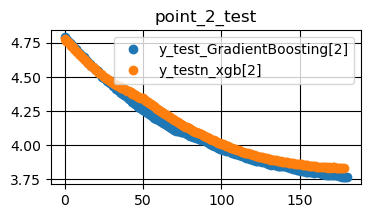

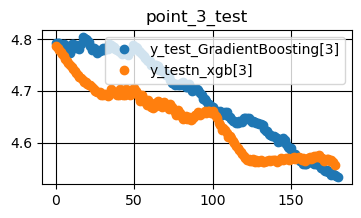

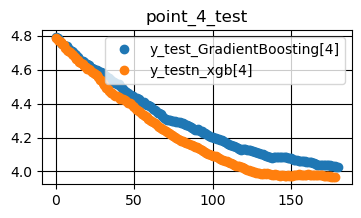

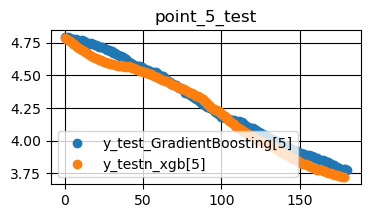

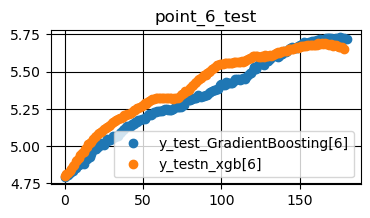

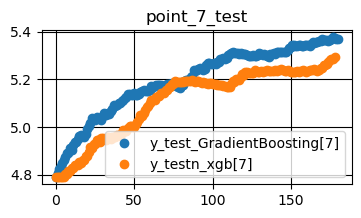

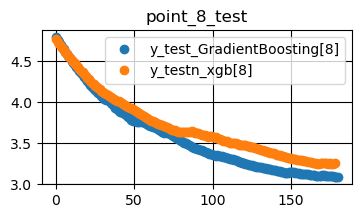

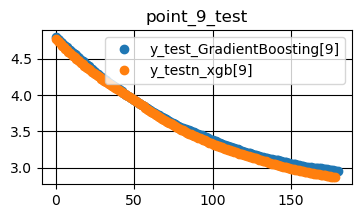

In [136]:
for i in range(10):
    plt.figure(figsize=(4, 2))
    plt.title(f'point_{i}_test')
    plt.plot(boost.staged_predict(x_test)[i], 'o', label=f'y_test_GradientBoosting[{i}]')
    plt.plot([xgb.predict(x_test, iteration_range = (0, j))[i] for j in range(1, 180)], 'o', label=f'y_testn_xgb[{i}]')
    plt.legend()
    plt.grid(True, color = 'k')